**Import necessary library**

In [1]:
import requests
import certifi
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator
from IPython.display import display, HTML
import numpy as np

**Replace with your API key**

In [2]:
api_key = "255446bcdde7ca9fe776258d09e8411bbb8d1cade2ebd6aba440f80f6817c3fd"

**EX2: The size of character parts from largest to smallest in these 20 plays**  

**Text set = Shakespeare 20 for demos**  
**Segment by text and by character**  
**Output – n=640**  
**Transform and chart – sort by Size, largest to smallest. Chart this row as a scatterplot.**

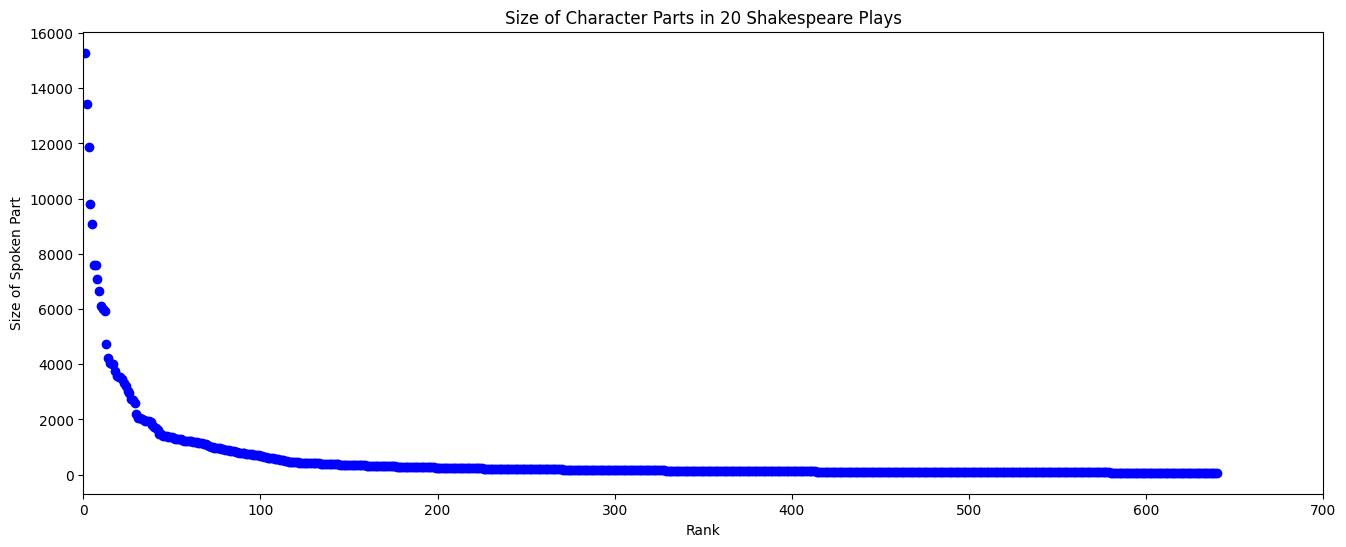

Word,Much Ado About Nothing Q1 (1),Coriolanus (1),Hamlet Q2 (1),Richard III Q1 (1),Merchant of Venice Q1 (1),Macbeth (1),Comedy of Errors (1),1 Henry IV Q1 (1),Romeo and Juliet Q2 (1),Twelfth Night (1),Julius Caesar (1),Richard II Q1 (1),Othello Q1 (1),Antony and Cleopatra (1),Tempest (1),Midsummer Night's Dream Q1 (1),King Lear Q1 (1),Love's Labor's Lost Q1 (1),Winter's Tale (1),Henry V F (1)
the,587,1106,1086,902,828,707,443,858,668,552,584,698,717,847,511,562,867,853,845,1063
and,627,732,925,802,602,561,450,843,713,521,632,668,745,649,510,568,683,576,633,988
i,714,578,592,724,695,349,498,711,645,654,527,438,843,576,499,464,676,516,700,468
to,430,707,710,667,447,378,331,448,522,396,413,527,555,532,307,328,520,452,624,516
of,365,533,652,587,445,354,223,642,387,426,353,486,433,476,321,271,465,442,510,700
you,496,646,550,359,449,207,305,321,294,451,392,143,476,368,217,275,458,347,469,370
a,467,411,519,341,425,237,247,559,457,400,254,251,425,326,309,266,373,491,414,416
is,390,388,493,307,315,303,202,284,465,383,305,287,495,450,250,208,385,355,388,438
my,280,257,506,571,363,192,265,332,358,342,189,431,411,313,287,201,445,235,405,283
in,317,376,446,388,297,218,224,376,317,282,227,281,308,293,185,241,312,327,255,426


In [3]:
# Replace with your actual text set ID 
textset_id = 86 

#Character to exlude from search
excludeWords = ["[","\\", "]", "_", "`", "!", "\"", "#", "%", "'", "(", ")", "+", ",", "-", "–", ".", "/", ":", ";", "{", "|", "}", "=", "~", "?" ]

request_url = "https://sia.ardc-hdcl-sia-iaw.cloud.edu.au/api/v1/word-frequencies"
character_parts_request = {
    'textSet': textset_id,
    'option': {
        'segmentByCharacter': True,  #Segment by character
        'blockMethod' : 0,           #Segment by text
        'outputSize': 640,
        'excludeWords': excludeWords,
    }
}

# Make API request
response = requests.post(request_url, json=character_parts_request, headers={"X-API-KEY": api_key}, timeout=1200)

# Create a dictionary to hold character frequencies
character_frequency_map = {}
character_frequency_text_map = {}
text_name = set()
word_type_map = {}
word_size_map = {}

# Handle the response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])
        name = block.get('name' , 'Unknown')
        
        for freq in freqs:
            word = freq.get('word' , "Unknown")
            word_count = freq.get('value', 0)
            
            character_frequency_map[word] = character_frequency_map.get(word, 0) + word_count
            
            # Store the frequency specific to this block
            if word not in character_frequency_text_map:
                character_frequency_text_map[word] = {}
            character_frequency_text_map[word][name] = character_frequency_text_map[word].get(name , 0) + word_count
        
        text_name.add(name)
        word_type_map[name] = block.get('uniqueWordCount' , 0)
        word_size_map[name] = block.get('size' , 0)

    # Sort by size and take the top 640 characters
    sorted_characters = sorted(character_frequency_map.items(), key=lambda x: x[1], reverse=True)
    names = [item[0] for item in sorted_characters]
    sizes = [item[1] for item in sorted_characters]

    # Scatterplot
    plt.figure(figsize=(16, 6))
    ranks = np.arange(1, len(names) + 1)
    plt.scatter(ranks, sizes, c='blue')
    plt.xticks(np.arange(0, 701, 100))  # Set tick marks up to 700
    plt.xlim([0, 700])  # Set x-axis limits up to 700
    plt.xlabel('Rank')
    plt.ylabel('Size of Spoken Part')
    plt.title('Size of Character Parts in 20 Shakespeare Plays')
    plt.show()
    
    # Table dispaly
    html = '<div style="overflow: auto; max-height: 500px; margin-top: 40px;"><table border="1">'
    # Table header
    html += '<tr><th>Word</th>'
    for name in text_name:
        html += f'<th style="white-space: nowrap;">{name}</th>'
    html += '</tr>'
    

    # Adding data rows
    for word in names:
        html += f"<tr><td>{word}</td>"
        for name in text_name:
            frequency = character_frequency_text_map.get(word, {}).get(name, 0)
            html += f"<td>{frequency}</td>"
        html += "</tr>"
        
    # Adding Word Types row
    html += "<tr><td>Word Types</td>"
    for block in blocks:
        column_name = block.get('name', '')
        word_types = word_type_map.get(column_name,0)
        html += f"<td>{word_types}</td>"
    html += "</tr>"
        
    # Adding Sizes row
    html += "<tr><td>Size</td>"
    for block in blocks:
        column_name = block.get('name', '')
        size = word_size_map.get(column_name,0)
        html += f"<td>{size}</td>"
    html += "</tr>"

    html += '</table></div>'

    display(HTML(html))


else:
    print(f"Failed: {response.status_code} {response.reason}")